In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [2]:
fuel = pd.read_csv('C:/Users/Kyungae_Yoon/Desktop/Kaggle/Exercise/Dataset/fuel.csv')

In [3]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [4]:
X = fuel.copy()
# Pop target
y = X.pop('FE')

In [5]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

In [6]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

In [7]:
X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

C:\Users\Kyungae_Yoon\anaconda3\envs\tf_env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
X

array([[ 0.91364344,  1.06800546,  0.52414834, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91364344,  1.06800546,  0.52414834, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53059417,  1.06800546,  0.52414834, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.23550436,  0.01521646,  0.52414834, ...,  0.        ,
         0.        ,  0.        ],
       [-0.23550436,  0.01521646,  0.52414834, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68381388,  1.06800546,  0.52414834, ...,  0.        ,
         0.        ,  0.        ]])

In [10]:
type(y)

pandas.core.series.Series

In [11]:
y

0       3.332911
1       3.242959
2       3.288402
3       3.220678
4       3.210844
          ...   
1102    3.417484
1103    3.394146
1104    3.417484
1105    3.392597
1106    3.265759
Name: FE, Length: 1107, dtype: float64

In [12]:
X.shape()

TypeError: 'tuple' object is not callable

In [17]:
X.shape

(1107, 50)

In [18]:
input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [19]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [22]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape = input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [25]:
model.compile(optimizer='Adam', loss='mae')

In [28]:
history = model.fit(X, y, batch_size=128, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 4ms/step - loss: 2.8078
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.0513
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6618
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.3949
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2628
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1933
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1563
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1258
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1054
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0944
Epoch 11/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0809
Epoch 12/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0739
Epoch 13/200
9/9 [==============================] - 0s 4ms/st

9/9 [==============================] - 0s 4ms/step - loss: 0.0411
Epoch 105/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0301
Epoch 106/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0313
Epoch 107/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0303
Epoch 108/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0293
Epoch 109/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0287
Epoch 110/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 111/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0282
Epoch 112/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0288
Epoch 113/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0309
Epoch 114/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0395
Epoch 115/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0385
Epoch 116/200
9/9 [==============================] - 0

In [29]:
history_df = pd.DataFrame(history.history)

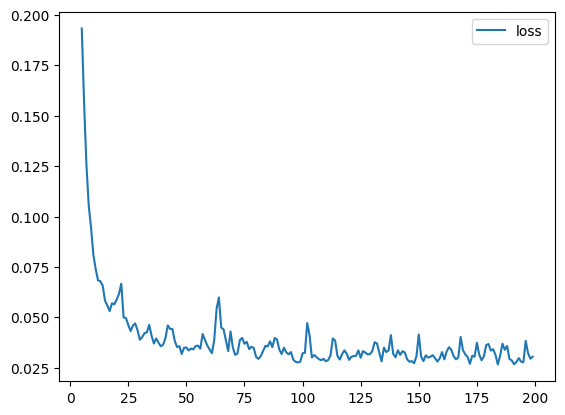

In [30]:
history_df.loc[5:, ['loss']].plot();


In [31]:
learning_rate = 0.05
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

NameError: name 'animate_sgd' is not defined